> Simulation Tables

# import

In [325]:
import pandas as pd

In [326]:
data_fivenodes = pd.read_csv('./simulation_results/Real_simulation_reshape/GCLSTM_fivedones_Simulation.csv')

In [327]:
data_chickenpox = pd.read_csv('./simulation_results/Real_simulation_reshape/GCLSTM_chikenpox_Simulation.csv')

In [328]:
data_pedal = pd.read_csv('./simulation_results/Real_simulation_reshape/GCLSTM_pedalme_Simulation.csv')

In [329]:
data_pedal2 = pd.read_csv('./simulation_results/Real_simulation_reshape/GCLSTM_pedalme_Simulation_itstgcnsnd.csv')

In [330]:
data__wiki = pd.read_csv('./simulation_results/Real_simulation_reshape/GCLSTM_wikimath.csv')

In [331]:
data_wiki_GSO = pd.read_csv('./simulation_results/Real_simulation_reshape/GCLSTM_wikimath_GSO_st.csv')

In [332]:
data_windmillsmall = pd.read_csv('./simulation_results/Real_simulation_reshape/GCLSTM_windmillsmall.csv')

In [333]:
data_monte = pd.read_csv('./simulation_results/Real_simulation_reshape/GCLSTM_monte.csv')

In [334]:
data = pd.concat([data_fivenodes,data_chickenpox,data_pedal,data__wiki,data_windmillsmall,data_monte]);data

,dataset,method,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time
0,fivenodes,STGCN,0.700000,rand,2,4,linear,50,1.299148,25.236690
1,fivenodes,STGCN,0.700000,rand,2,4,nearest,50,1.335855,24.400978
2,fivenodes,IT-STGCN,0.700000,rand,2,4,linear,50,1.305905,33.300703
3,fivenodes,IT-STGCN,0.700000,rand,2,4,nearest,50,1.248720,33.621689
4,fivenodes,STGCN,0.700000,rand,2,4,linear,50,1.288252,24.205301
...,...,...,...,...,...,...,...,...,...,...
205,monte,IT-STGCN,0.149142,block,4,12,nearest,50,0.952961,425.697002
206,monte,STGCN,0.149142,block,4,12,nearest,50,0.949079,376.177733
207,monte,IT-STGCN,0.149142,block,4,12,nearest,50,0.954733,341.151908
208,monte,STGCN,0.149142,block,4,12,nearest,50,0.949607,383.659445


In [335]:
data.to_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_GCLSTM.csv',index=False)

In [307]:
pedal_wiki_GSO = pd.concat([data_pedal2,data_wiki_GSO])

In [285]:
pedal_wiki_GSO.to_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_GCLSTM_pedal_wiki_GSO.csv',index=False)

# Fivenodes

## Baseline

In [239]:
pd.merge(data.query("dataset=='fivenodes' and mtype!='rand' and mtype!='block'").groupby(['nof_filters','method','lags'])['mse'].mean().reset_index(),
         data.query("dataset=='fivenodes' and mtype!='rand' and mtype!='block'").groupby(['nof_filters','method','lags'])['mse'].std().reset_index(),
         on=['method','nof_filters','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,nof_filters,method,lags,mean,std
0,4,IT-STGCN,2,1.212,0.026
1,4,STGCN,2,1.206,0.020


## Random

In [240]:
pd.merge(data.query("dataset=='fivenodes' and mtype=='rand'").groupby(['mrate','nof_filters','method','lags'])['mse'].mean().reset_index(),
         data.query("dataset=='fivenodes' and mtype=='rand'").groupby(['mrate','nof_filters','method','lags'])['mse'].std().reset_index(),
         on=['method','nof_filters','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mrate,nof_filters,method,lags,mean,std
0,0.7,4,IT-STGCN,2,1.226,0.033
1,0.7,4,STGCN,2,1.245,0.052
2,0.8,4,IT-STGCN,2,1.236,0.028
3,0.8,4,STGCN,2,1.261,0.048


## Block

In [241]:
pd.merge(data.query("dataset=='fivenodes' and mtype=='block'").groupby(['mrate','nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='fivenodes' and mtype=='block'").groupby(['mrate','nof_filters','method'])['mse'].std().reset_index(),
         on=['method','nof_filters','mrate']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mrate,nof_filters,method,mean,std
0,0.125,4,IT-STGCN,1.217,0.023
1,0.125,4,STGCN,1.246,0.036


# ChickenpoxDatasetLoader(lags=4)

## Baseline

In [242]:
pd.merge(data.query("dataset=='chickenpox' and mtype!='rand' and mtype!='block'").groupby(['nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='chickenpox' and mtype!='rand' and mtype!='block'").groupby(['nof_filters','method'])['mse'].std().reset_index(),
         on=['method','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("nof_filters==16")

,nof_filters,method,mean,std
0,16,IT-STGCN,0.878,0.047
1,16,STGCN,0.892,0.054


## Random

In [243]:
pd.merge(data.query("dataset=='chickenpox' and mtype=='rand'").groupby(['mrate','inter_method','nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='chickenpox' and mtype=='rand'").groupby(['mrate','inter_method','nof_filters','method'])['mse'].std().reset_index(),
         on=['method','inter_method','mrate','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mrate,inter_method,nof_filters,method,mean,std
0,0.3,linear,16,IT-STGCN,0.850,0.022
1,0.3,linear,16,STGCN,1.050,0.036
2,0.8,linear,16,IT-STGCN,1.371,0.072
3,0.8,linear,16,STGCN,2.172,0.186


## Block

In [244]:
pd.merge(data.query("dataset=='chickenpox' and mtype=='block'").groupby(['inter_method','mrate','nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='chickenpox' and mtype=='block'").groupby(['inter_method','mrate','nof_filters','method'])['mse'].std().reset_index(),
         on=['method','inter_method','mrate','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'})

,inter_method,mrate,nof_filters,method,mean,std
0,linear,0.28777,16,IT-STGCN,0.883365,0.045500
1,linear,0.28777,16,STGCN,0.889922,0.033144
2,nearest,0.28777,16,IT-STGCN,0.901308,0.054389
3,nearest,0.28777,16,STGCN,0.884887,0.041756


# PedalMeDatasetLoader (lags=4)

## Baseline

In [245]:
pd.merge(data.query("dataset=='pedalme' and mtype!='rand' and mtype!='block'").groupby(['lags','nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='pedalme' and mtype!='rand' and mtype!='block'").groupby(['lags','nof_filters','method'])['mse'].std().reset_index(),
         on=['method','lags','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4")

,lags,nof_filters,method,mean,std
0,4,4,IT-STGCN,1.170,0.040
1,4,4,STGCN,1.191,0.036


## Random

In [246]:
pd.merge(data.query("dataset=='pedalme' and mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data.query("dataset=='pedalme' and mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mrate,lags,inter_method,method,mean,std
0,0.3,4,linear,IT-STGCN,1.202,0.029
1,0.3,4,linear,STGCN,1.267,0.041
2,0.3,4,nearest,IT-STGCN,1.211,0.039
3,0.3,4,nearest,STGCN,1.256,0.038
4,0.6,4,linear,IT-STGCN,1.278,0.040
5,0.6,4,linear,STGCN,1.364,0.068
6,0.6,4,nearest,IT-STGCN,1.259,0.042
7,0.6,4,nearest,STGCN,1.365,0.064


## Block

In [247]:
pd.merge(data.query("dataset=='pedalme' and mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data.query("dataset=='pedalme' and mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4")

,mrate,lags,inter_method,method,mean,std
0,0.286,4,linear,IT-STGCN,1.182,0.031
1,0.286,4,linear,STGCN,1.211,0.023
2,0.286,4,nearest,IT-STGCN,1.195,0.029
3,0.286,4,nearest,STGCN,1.248,0.019


## W_st

In [248]:
pd.merge(data_pedal2.query("mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data_pedal2.query("mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4")

,mrate,lags,inter_method,method,mean,std
0,0.3,4,linear,IT-STGCN,1.191,0.041
1,0.3,4,linear,STGCN,1.264,0.041
2,0.3,4,nearest,IT-STGCN,1.193,0.033
3,0.3,4,nearest,STGCN,1.250,0.049
4,0.6,4,linear,IT-STGCN,1.260,0.084
5,0.6,4,linear,STGCN,1.340,0.059
6,0.6,4,nearest,IT-STGCN,1.231,0.044
7,0.6,4,nearest,STGCN,1.355,0.068


In [249]:
pd.merge(data_pedal2.query("mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data_pedal2.query("mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4")

,mrate,lags,inter_method,method,mean,std
0,0.286,4,linear,IT-STGCN,1.182,0.045
1,0.286,4,linear,STGCN,1.225,0.030
2,0.286,4,nearest,IT-STGCN,1.185,0.035
3,0.286,4,nearest,STGCN,1.249,0.027


# WikiMathsDatasetLoader (lags=8)

## Baseline

In [250]:
pd.merge(data.query("dataset=='wikimath' and mrate==0").groupby(['lags','nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='wikimath' and mrate==0").groupby(['lags','nof_filters','method'])['mse'].std().reset_index(),
         on=['lags','nof_filters','method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,lags,nof_filters,method,mean,std
0,8,64,IT-STGCN,0.643,0.024
1,8,64,STGCN,0.645,0.018


## Random

In [251]:
pd.merge(data.query("dataset=='wikimath' and mtype=='rand'").groupby(['mrate','lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='wikimath' and mtype=='rand'").groupby(['mrate','lags','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mrate,lags,method,mean,std
0,0.3,8,IT-STGCN,0.628,0.020
1,0.3,8,STGCN,0.674,0.020
2,0.8,8,IT-STGCN,0.815,0.058
3,0.8,8,STGCN,1.407,0.117


## Block

In [252]:
pd.merge(data.query("dataset=='wikimath' and mtype=='block'").groupby(['mrate','lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='wikimath' and mtype=='block'").groupby(['mrate','lags','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'})

,mrate,lags,method,mean,std
0,0.119837,8,IT-STGCN,0.640461,0.019198
1,0.119837,8,STGCN,0.637772,0.012983


## missing values on the same nodes

In [253]:
pd.merge(data_wiki_GSO.groupby(['mrate','lags','method'])['mse'].mean().reset_index(),
        data_wiki_GSO.groupby(['mrate','lags','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mrate,lags,method,mean,std
0,0.512,8,IT-STGCN,0.617,0.011
1,0.512,8,STGCN,0.823,0.048


# WindmillOutputSmallDatasetLoader (lags=8)

## Baseline

In [308]:
pd.merge(data.query("dataset=='windmillsmall' and mrate==0").groupby(['lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='windmillsmall' and mrate==0").groupby(['lags','method'])['mse'].std().reset_index(),
         on=['method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,lags,method,mean,std
0,8,IT-STGCN,0.987,NaN
1,8,STGCN,0.987,NaN


## Random

In [309]:
pd.merge(data.query("dataset=='windmillsmall' and mtype=='rand'").groupby(['mrate','lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='windmillsmall' and mtype=='rand'").groupby(['mrate','lags','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mrate,lags,method,mean,std
0,0.7,8,IT-STGCN,1.116,0.022
1,0.7,8,STGCN,1.575,0.098


## Block

In [310]:
pd.merge(data.query("dataset=='windmillsmall' and mtype=='block'").groupby(['mrate','lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='windmillsmall' and mtype=='block'").groupby(['mrate','lags','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mrate,lags,method,mean,std
0,0.081,8,IT-STGCN,0.984,0.002
1,0.081,8,STGCN,0.985,0.002


# Montevideobus (lags=4)

## Baseline

In [257]:
pd.merge(data.query("dataset=='monte' and mrate==0").groupby(['lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='monte' and mrate==0").groupby(['lags','method'])['mse'].std().reset_index(),
         on=['method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,lags,method,mean,std
0,4,IT-STGCN,0.969,0.012
1,4,STGCN,0.970,0.011


## Random

In [258]:
pd.merge(data.query("dataset=='monte' and mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data.query("dataset=='monte' and mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['mrate','inter_method','method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'})

,mrate,lags,inter_method,method,mean,std
0,0.8,4,nearest,IT-STGCN,1.031532,0.028135
1,0.8,4,nearest,STGCN,1.140193,0.061301


## Block

In [259]:
pd.merge(data.query("dataset=='monte' and mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data.query("dataset=='monte' and mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['method','mrate','inter_method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'})

,mrate,lags,inter_method,method,mean,std
0,0.149142,4,nearest,IT-STGCN,0.958620,0.007766
1,0.149142,4,nearest,STGCN,0.955762,0.005461


# Check

In [1]:
import itstgcnGCLSTM
import torch
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import random

In [4]:
class Eval_csy:
    def __init__(self,learner,train_dataset):
        self.learner = learner
        # self.learner.model.eval()
        try:self.learner.model.eval()
        except:pass
        self.train_dataset = train_dataset
        self.lags = self.learner.lags
        rslt_tr = self.learner(self.train_dataset) 
        self.X_tr = rslt_tr['X']
        self.y_tr = rslt_tr['y']
        self.f_tr = torch.concat([self.train_dataset[0].x.T,self.y_tr],axis=0).float()
        self.yhat_tr = rslt_tr['yhat']
        self.fhat_tr = torch.concat([self.train_dataset[0].x.T,self.yhat_tr],axis=0).float()

In [5]:
from plotnine import *

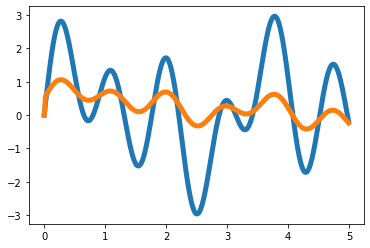

In [6]:
T = 500
t = np.arange(T)/T * 5

x = 1*np.sin(2*t)+np.sin(4*t)+1.5*np.sin(7*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}

# save_data(data_dict1, './data/toy_example1.pkl')

data1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

# save_data(data1, './data/toy_example_true1.csv')


In [7]:
loader1 = itstgcnGCLSTM.DatasetLoader(data_dict1)

In [8]:
dataset = loader1.get_dataset(lags=4)

mindex = itstgcn.rand_mindex(dataset,mrate=0)
dataset_miss = itstgcn.miss(dataset,mindex,mtype='rand')

In [9]:
mindex = [random.sample(range(0, T), int(T*0.8)),[np.array(list(range(20,30)))]]
dataset_miss = itstgcnGCLSTM.miss(dataset,mindex,mtype='block')

/home/csy/Dropbox/blog/posts/GCN/itstgcnGCLSTM/utils.py:71: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343998658/work/torch/csrc/utils/tensor_new.cpp:245.)


In [10]:
dataset_padded = itstgcnGCLSTM.padding(dataset_miss,interpolation_method='linear')

`-` 학습

In [11]:
lrnr = itstgcnGCLSTM.StgcnLearner(dataset_padded)

In [19]:
lrnr.learn(filters=32,epoch=10)

In [20]:
lrnr1 = itstgcnGCLSTM.ITStgcnLearner(dataset_padded)

In [23]:
lrnr1.learn(filters=16,epoch=10)

In [24]:
evtor = Eval_csy(lrnr,dataset_padded)

In [25]:
evtor1 = Eval_csy(lrnr1,dataset_padded)

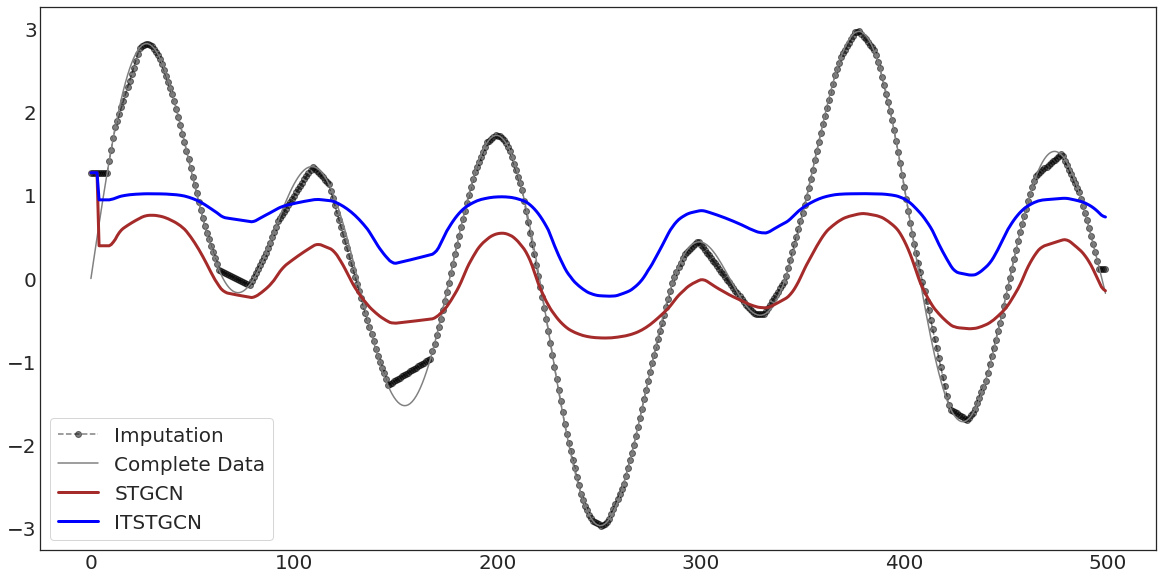

In [26]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor.f_tr[:,0],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['x'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax.plot(evtor1.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

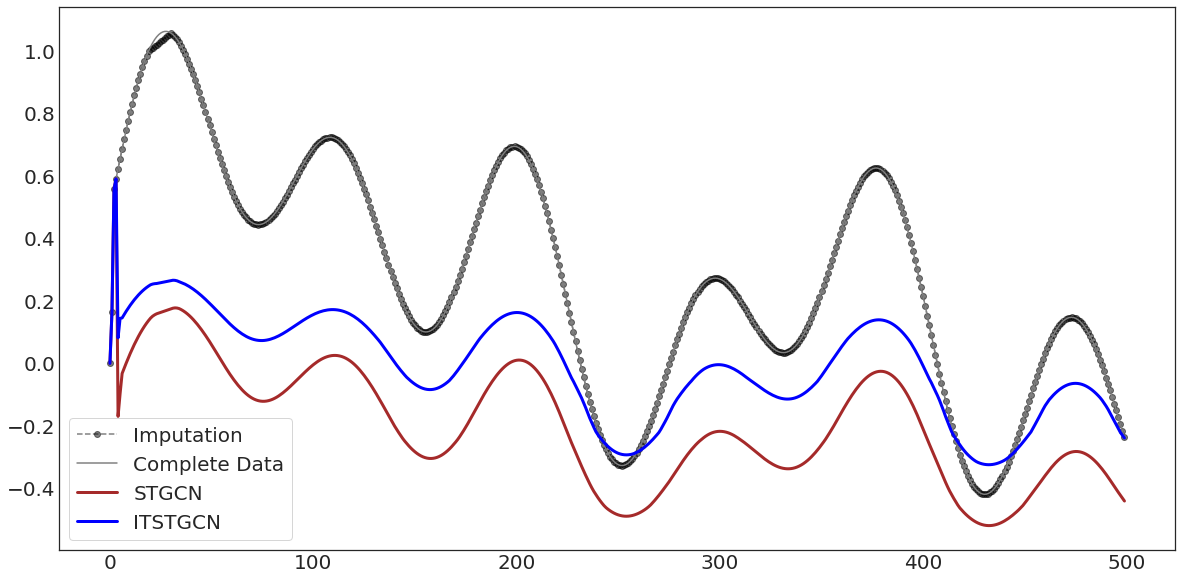

In [27]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor.f_tr[:,1],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['y'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax.plot(evtor1.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

In [13]:
import itstgcnsnd
import torch
import numpy as np

In [14]:
loader1 = itstgcnsnd.DatasetLoader(data_dict1)

NameError: name 'data_dict1' is not defined

In [ ]:
dataset = loader1.get_dataset(lags=2)

mindex = itstgcn.rand_mindex(dataset,mrate=0)
dataset_miss = itstgcn.miss(dataset,mindex,mtype='rand')

In [ ]:
mindex = [random.sample(range(0, T), int(T*0.5)),[np.array(list(range(20,30)))]]
dataset_miss = itstgcnsnd.miss(dataset,mindex,mtype='block')

In [ ]:
dataset_padded = itstgcnsnd.padding(dataset_miss,interpolation_method='linear')

`-` 학습

In [ ]:
lrnr = itstgcnsnd.StgcnLearner(dataset_padded)

In [ ]:
lrnr.learn(filters=2,epoch=5)

In [ ]:
lrnr1 = itstgcnsnd.ITStgcnLearner(dataset_padded)

In [ ]:
lrnr1.learn(filters=2,epoch=5)

In [ ]:
evtor = Eval_csy(lrnr,dataset_padded)

In [ ]:
evtor1 = Eval_csy(lrnr1,dataset_padded)

In [ ]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor.f_tr[:,0],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['x'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax.plot(evtor1.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

In [ ]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor.f_tr[:,1],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['y'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax.plot(evtor1.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

# hyperparameter 

In [28]:
import itstgcn

data_dict = itstgcn.load_data('./data/fivenodes.pkl')
loader = itstgcn.DatasetLoader(data_dict)

from torch_geometric_temporal.dataset import ChickenpoxDatasetLoader
loader1 = ChickenpoxDatasetLoader()

from torch_geometric_temporal.dataset import PedalMeDatasetLoader
loader2 = PedalMeDatasetLoader()

from torch_geometric_temporal.dataset import WikiMathsDatasetLoader
loader3 = WikiMathsDatasetLoader()

from torch_geometric_temporal.dataset import WindmillOutputSmallDatasetLoader
loader6 = WindmillOutputSmallDatasetLoader()

from torch_geometric_temporal.dataset import MontevideoBusDatasetLoader
loader10 = MontevideoBusDatasetLoader()

In [29]:
try:
    from tqdm import tqdm
except ImportError:
    def tqdm(iterable):
        return iterable

|Dataset|RecurrentGCN|Method|Missing Rate|Filters|Lags|Mean|SD|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|fivenodes|GConvGRU|IT-STGCN|0.7|12|2|1.167|0.059|
|fivenodes|GConvGRU|STGCN|0.7|12|2|2.077|0.252|
|chickenpox|GConvGRU|IT-STGCN|0.8|16|4|1.586|0.199|
|chickenpox|GConvGRU|STGCN|0.8|16|4|2.529|0.292|
|pedalme|GConvGRU|IT-STGCN|0.6|12|4|1.571|0.277|
|pedalme|GConvGRU|STGCN|0.6|12|4|1.753|0.239|
|wikimath|GConvGRU|IT-STGCN|0.8|12|8|0.687|0.021|
|wikimath|GConvGRU|STGCN|0.8|12|8|0.932|0.04|
|windmillsmall|GConvGRU|IT-STGCN|0.7|12|8|1.180|0.035|
|windmillsmall|GConvGRU|STGCN|0.7|12|8|1.636|0.088|
|monte|GConvGRU|IT-STGCN|0.8|12|4|1.096|0.019|
|monte|GConvGRU|STGCN|0.8|12|4|1.516|0.040|

In [30]:
import torch
import torch.nn.functional as F
from torch_geometric_temporal.nn.recurrent import GCLSTM

# from torch_geometric_temporal.dataset import ChickenpoxDatasetLoader
from torch_geometric_temporal.signal import temporal_signal_split

# loader1 = ChickenpoxDatasetLoader()

dataset = loader.get_dataset(lags=2)
dataset1 = loader1.get_dataset(lags=4)
dataset2 = loader2.get_dataset(lags=4)
dataset3 = loader3.get_dataset(lags=8)
dataset6 = loader6.get_dataset(lags=8)
dataset10 = loader10.get_dataset(lags=4)

train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio=0.2)
train_dataset1, test_dataset1 = temporal_signal_split(dataset1, train_ratio=0.2)
train_dataset2, test_dataset2 = temporal_signal_split(dataset2, train_ratio=0.2)
train_dataset3, test_dataset3 = temporal_signal_split(dataset3, train_ratio=0.2)
train_dataset6, test_dataset6 = temporal_signal_split(dataset6, train_ratio=0.2)
train_dataset10, test_dataset10 = temporal_signal_split(dataset10, train_ratio=0.2)

In [35]:
class RecurrentGCN(torch.nn.Module):
    def __init__(self, node_features, filters):
        super(RecurrentGCN, self).__init__()
        self.recurrent = GCLSTM(node_features, filters, 1)
        self.linear = torch.nn.Linear(filters, 1)

    def forward(self, x, edge_index, edge_weight, h, c):
        h_0, c_0 = self.recurrent(x, edge_index, edge_weight, h, c)
        h = F.relu(h_0)
        h = self.linear(h)
        return h, h_0, c_0

### fivenodes Nodes = 2, Filters = 4

In [53]:
model = RecurrentGCN(node_features=2, filters=4)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()

for epoch in tqdm(range(50)): #200
    cost = 0
    h, c = None, None
    _b = []
    _d=[]
    for time, snapshot in enumerate(train_dataset):
        y_hat, h, c = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
        y_hat = y_hat.reshape(-1)
        cost = cost + torch.mean((y_hat-snapshot.y)**2)
        _b.append(y_hat)
        _d.append(cost)
    cost = cost / (time+1)
    cost.backward()
    optimizer.step()
    optimizer.zero_grad()

100%|██████████| 50/50 [00:06<00:00,  7.93it/s]


In [54]:
model.eval()
cost = 0
_a=[]
_a1=[]
for time, snapshot in enumerate(test_dataset):
    y_hat, h, c = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
    y_hat = y_hat.reshape(-1)
    cost = cost + torch.mean((y_hat-snapshot.y)**2)
    _a.append(y_hat)
    _a1.append(cost)
cost = cost / (time+1)
cost = cost.item()
print("MSE: {:.4f}".format(cost))

MSE: 1.2507


In [55]:
_c = [_a1[i].detach() for i in range(len(_a1))]

_e = [_d[i].detach() for i in range(len(_d))]

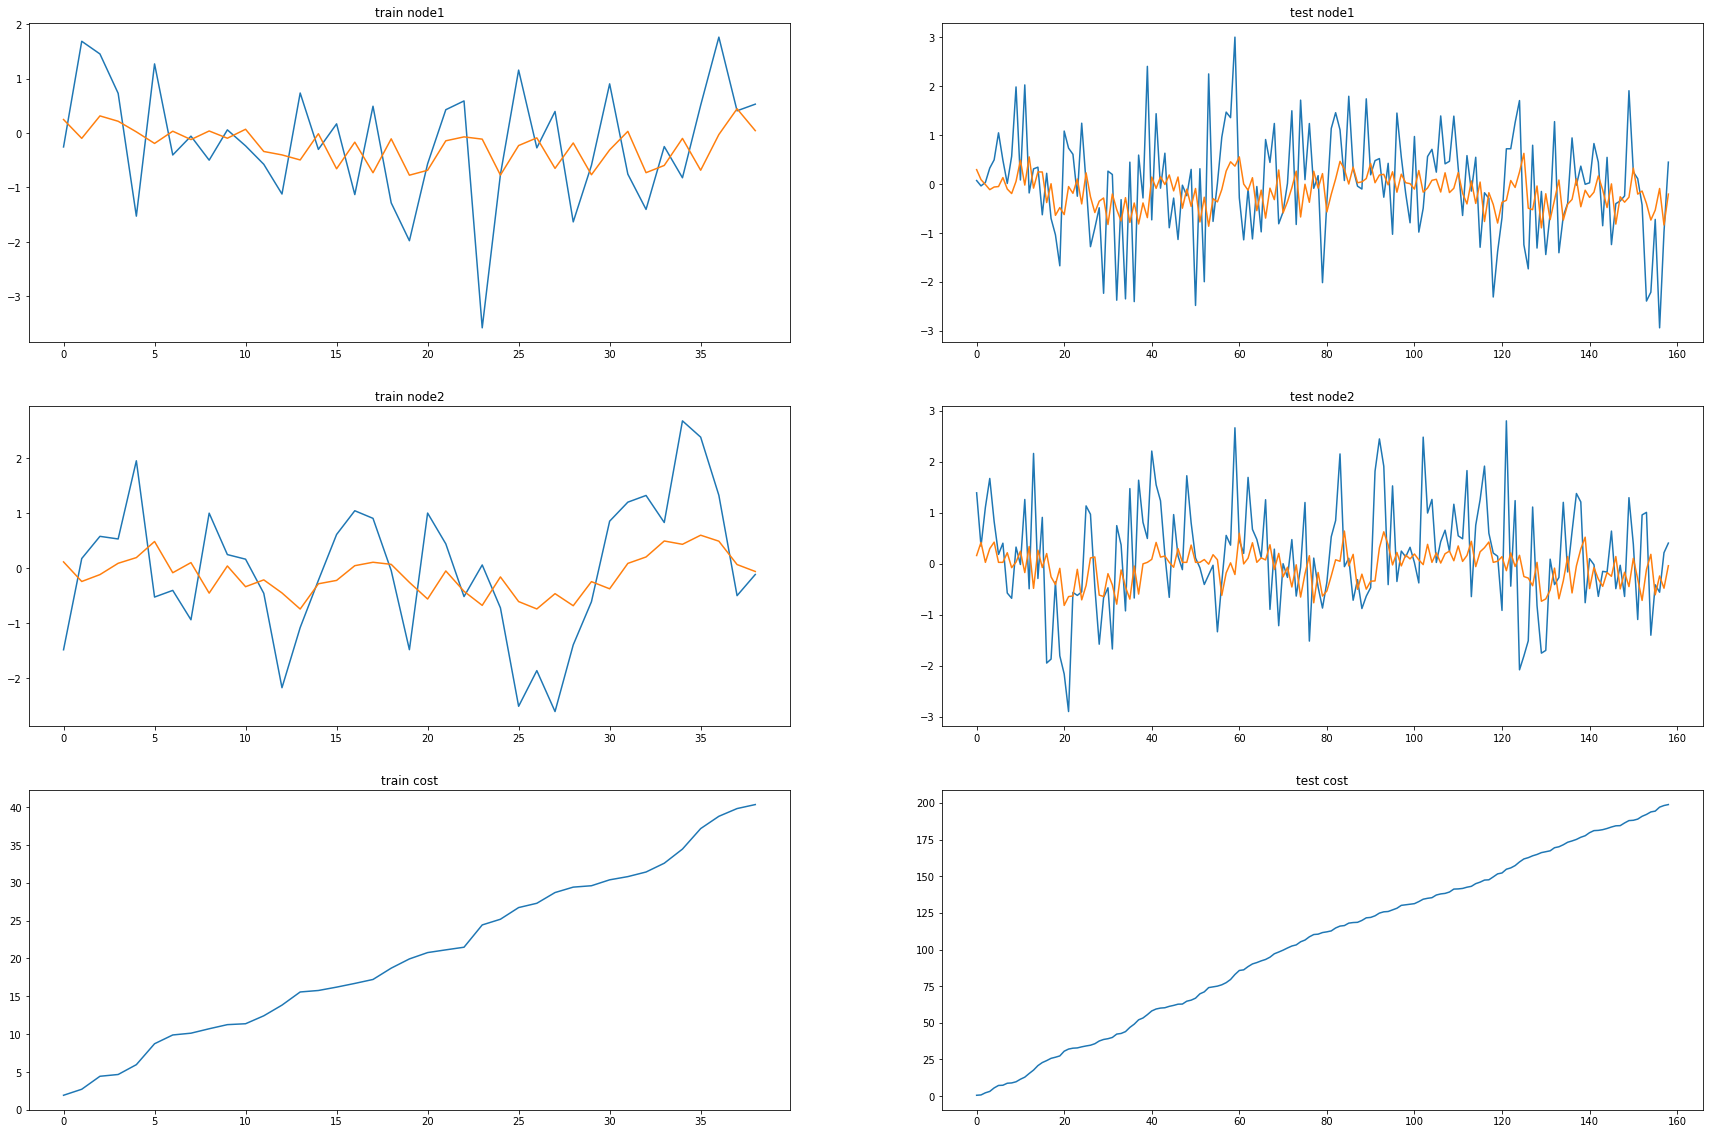

In [56]:
fig, (( ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(30,20))

ax1.set_title('train node1')
ax1.plot([train_dataset.targets[i][0] for i in range(train_dataset.snapshot_count)])
ax1.plot(torch.tensor([_b[i].detach()[0] for i in range(train_dataset.snapshot_count)]))

ax2.set_title('test node1')
ax2.plot([test_dataset.targets[i][0] for i in range(test_dataset.snapshot_count)])
ax2.plot(torch.tensor([_a[i].detach()[0] for i in range(test_dataset.snapshot_count)]))

ax3.set_title('train node2')
ax3.plot([train_dataset.targets[i][1] for i in range(train_dataset.snapshot_count)])
ax3.plot(torch.tensor([_b[i].detach()[1] for i in range(train_dataset.snapshot_count)]))


ax4.set_title('test node2')
ax4.plot([test_dataset.targets[i][1] for i in range(test_dataset.snapshot_count)])
ax4.plot(torch.tensor([_a[i].detach()[1] for i in range(test_dataset.snapshot_count)]))

ax5.set_title('train cost')
ax5.plot(_e)

ax6.set_title('test cost')
ax6.plot(_c)

In [1]:
import itstgcnGCLSTM
import torch
import itstgcnGCLSTM.planner 
import pandas as pd

import numpy as np
import random

In [2]:
data_dict = itstgcnGCLSTM.load_data('./data/fivenodes.pkl')
loader = itstgcnGCLSTM.DatasetLoader(data_dict)

In [3]:
plans_stgcn_rand = {
    'max_iteration': 15, 
    'method': ['STGCN', 'IT-STGCN'], 
    'mrate': [0.7],
    'lags': [2], 
    'nof_filters': [4], 
    'inter_method': ['linear','nearest'],
    'epoch': [50]
}

plnr = itstgcnGCLSTM.planner.PLNR_STGCN_RAND(plans_stgcn_rand,loader,dataset_name='fivenodes')

plnr.simulate()

In [ ]:
plnr = itstgcnGCLSTM.planner.PLNR_STGCN_RAND(plans_stgcn_rand,loader,dataset_name='fivenodes')

plnr.simulate()

In [ ]:
plans_stgcn_rand = {
    'max_iteration': 15, 
    'method': ['STGCN', 'IT-STGCN'], 
    'mrate': [0.8],
    'lags': [2], 
    'nof_filters': [4], 
    'inter_method': ['linear','nearest'],
    'epoch': [50]
}

In [ ]:
plnr = itstgcnGCLSTM.planner.PLNR_STGCN_RAND(plans_stgcn_rand,loader,dataset_name='fivenodes')

plnr.simulate()

In [ ]:
plnr = itstgcnGCLSTM.planner.PLNR_STGCN_RAND(plans_stgcn_rand,loader,dataset_name='fivenodes')

plnr.simulate()

In [ ]:
plans_stgcn_rand = {
    'max_iteration': 15, 
    'method': ['STGCN', 'IT-STGCN'], 
    'mrate': [0],
    'lags': [2], 
    'nof_filters': [4], 
    'inter_method': ['linear','nearest'],
    'epoch': [50]
}

In [ ]:
plnr = itstgcnGCLSTM.planner.PLNR_STGCN_RAND(plans_stgcn_rand,loader,dataset_name='fivenodes')

plnr.simulate()

In [ ]:
plnr = itstgcnGCLSTM.planner.PLNR_STGCN_RAND(plans_stgcn_rand,loader,dataset_name='fivenodes')

plnr.simulate()

In [ ]:
mindex= [[],[],[],list(range(50,150)),[]]
# mindex= [list(range(50,150)),[],list(range(50,90)),list(range(50,150)),[]] # node 2
plans_stgcn_block = {
    'max_iteration': 15, 
    'method': ['STGCN', 'IT-STGCN'],
    'mindex': [mindex],
    'lags': [2], 
    'nof_filters': [12], 
    'inter_method': ['linear','nearest'],
    'epoch': [50]
}

In [ ]:
plnr = itstgcnGCLSTM.planner.PLNR_STGCN_MANUAL(plans_stgcn_block,loader1,dataset_name='fivenodes')

plnr.simulate(mindex=mindex,mtype='block')

In [ ]:
plnr = itstgcnGCLSTM.planner.PLNR_STGCN_MANUAL(plans_stgcn_block,loader1,dataset_name='fivenodes')

plnr.simulate(mindex=mindex,mtype='block')

### Chickenpox Nodes = 4, Filters = 16

In [93]:
model1 = RecurrentGCN(node_features=4, filters=16)

optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.01)

model1.train()

for epoch in tqdm(range(50)): #200
    cost = 0
    h, c = None, None
    _b = []
    _d=[]
    for time, snapshot in enumerate(train_dataset1):
        y_hat, h, c = model1(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
        y_hat = y_hat.reshape(-1)
        cost = cost + torch.mean((y_hat-snapshot.y)**2)
        _b.append(y_hat)
        _d.append(cost)
    cost = cost / (time+1)
    cost.backward()
    optimizer1.step()
    optimizer1.zero_grad()

100%|██████████| 50/50 [00:17<00:00,  2.79it/s]


In [94]:
model1.eval()
cost = 0
_a=[]
_a1=[]
for time, snapshot in enumerate(test_dataset1):
    y_hat, h, c = model1(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
    y_hat = y_hat.reshape(-1)
    cost = cost + torch.mean((y_hat-snapshot.y)**2)
    _a.append(y_hat)
    _a1.append(cost)
cost = cost / (time+1)
cost = cost.item()
print("MSE: {:.4f}".format(cost))

MSE: 0.6817


In [95]:
_e = [_d[i].detach() for i in range(len(_d))]

_c = [_a1[i].detach() for i in range(len(_a1))]

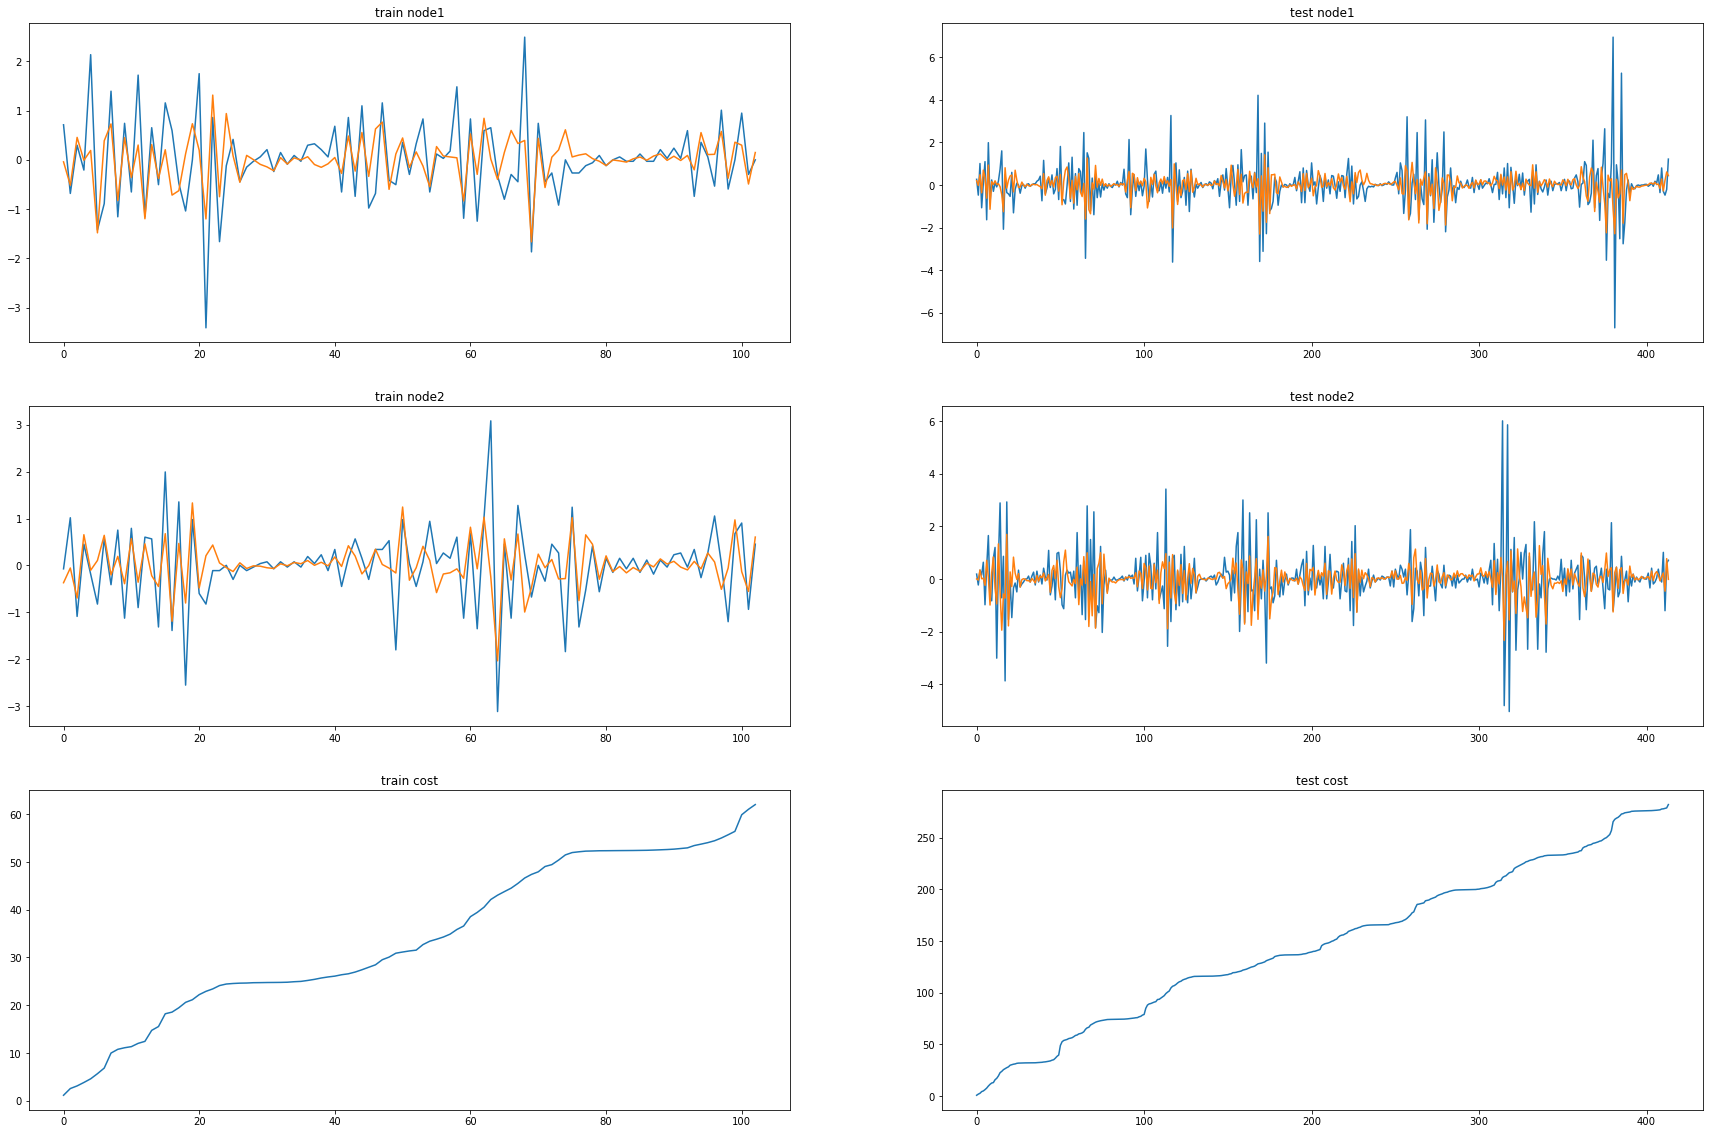

In [96]:
fig, (( ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(30,20))

ax1.set_title('train node1')
ax1.plot([train_dataset1.targets[i][0] for i in range(train_dataset1.snapshot_count)])
ax1.plot(torch.tensor([_b[i].detach()[0] for i in range(train_dataset1.snapshot_count)]))

ax2.set_title('test node1')
ax2.plot([test_dataset1.targets[i][0] for i in range(test_dataset1.snapshot_count)])
ax2.plot(torch.tensor([_a[i].detach()[0] for i in range(test_dataset1.snapshot_count)]))

ax3.set_title('train node2')
ax3.plot([train_dataset1.targets[i][1] for i in range(train_dataset1.snapshot_count)])
ax3.plot(torch.tensor([_b[i].detach()[1] for i in range(train_dataset1.snapshot_count)]))


ax4.set_title('test node2')
ax4.plot([test_dataset1.targets[i][1] for i in range(test_dataset1.snapshot_count)])
ax4.plot(torch.tensor([_a[i].detach()[1] for i in range(test_dataset1.snapshot_count)]))

ax5.set_title('train cost')
ax5.plot(_e)

ax6.set_title('test cost')
ax6.plot(_c)

### Pedalme Nodes = 4, Filters = 4

In [197]:
model2 = RecurrentGCN(node_features=4, filters=4)

optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.01)

model2.train()

for epoch in tqdm(range(50)): #200
    cost = 0
    h, c = None, None
    _b = []
    _d=[]
    for time, snapshot in enumerate(train_dataset2):
        y_hat, h, c = model2(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
        y_hat = y_hat.reshape(-1)
        cost = cost + torch.mean((y_hat-snapshot.y)**2)
        _b.append(y_hat)
        _d.append(cost)
    cost = cost / (time+1)
    cost.backward()
    optimizer2.step()
    optimizer2.zero_grad()

100%|██████████| 50/50 [00:01<00:00, 46.16it/s]


In [198]:
model2.eval()
cost = 0
_a=[]
_a1=[]
for time, snapshot in enumerate(test_dataset2):
    y_hat, h, c = model2(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
    y_hat = y_hat.reshape(-1)
    cost = cost + torch.mean((y_hat-snapshot.y)**2)
    _a.append(y_hat)
    _a1.append(cost)
cost = cost / (time+1)
cost = cost.item()
print("MSE: {:.4f}".format(cost))

MSE: 0.4983


In [199]:
_e = [_d[i].detach() for i in range(len(_d))]

In [200]:
_c = [_a1[i].detach() for i in range(len(_a1))]

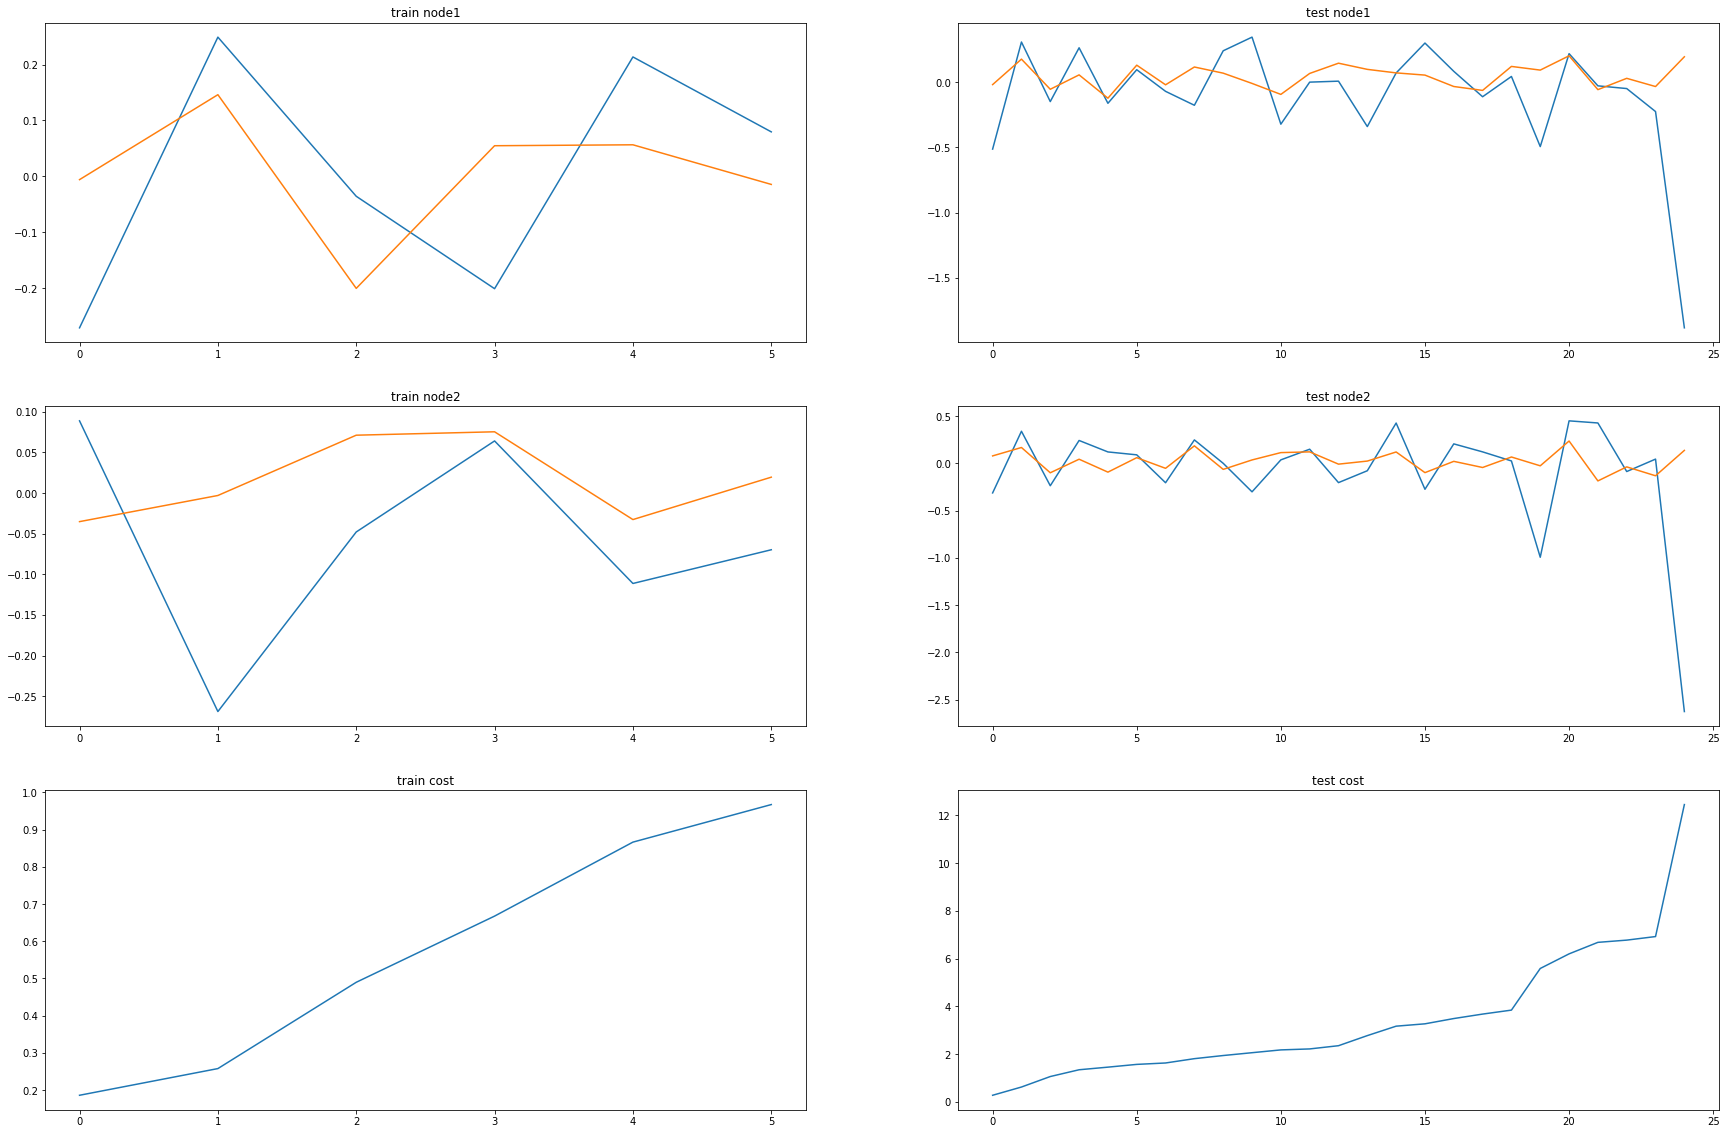

In [201]:
]

fig, (( ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(30,20))

ax1.set_title('train node1')
ax1.plot([train_dataset2.targets[i][0] for i in range(train_dataset2.snapshot_count)])
ax1.plot(torch.tensor([_b[i].detach()[0] for i in range(train_dataset2.snapshot_count)]))

ax2.set_title('test node1')
ax2.plot([test_dataset2.targets[i][0] for i in range(test_dataset2.snapshot_count)])
ax2.plot(torch.tensor([_a[i].detach()[0] for i in range(test_dataset2.snapshot_count)]))

ax3.set_title('train node2')
ax3.plot([train_dataset2.targets[i][1] for i in range(train_dataset2.snapshot_count)])
ax3.plot(torch.tensor([_b[i].detach()[1] for i in range(train_dataset2.snapshot_count)]))

ax4.set_title('test node2')
ax4.plot([test_dataset2.targets[i][1] for i in range(test_dataset2.snapshot_count)])
ax4.plot(torch.tensor([_a[i].detach()[1] for i in range(test_dataset2.snapshot_count)]))

ax5.set_title('train cost')
ax5.plot(_e)

ax6.set_title('test cost')
ax6.plot(_c)

### Wikimaths Nodes = 8, Filters = 64

In [212]:
model3 = RecurrentGCN(node_features=8, filters=64)

optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.01)

model3.train()

for epoch in tqdm(range(10)): #200
    cost = 0
    h, c = None, None
    _b = []
    _d=[]
    for time, snapshot in enumerate(train_dataset3):
        y_hat, h, c = model3(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
        y_hat = y_hat.reshape(-1)
        cost = cost + torch.mean((y_hat-snapshot.y)**2)
        _b.append(y_hat)
        _d.append(cost)
    cost = cost / (time+1)
    cost.backward()
    optimizer3.step()
    optimizer3.zero_grad()

100%|██████████| 10/10 [00:16<00:00,  1.66s/it]


In [213]:
model3.eval()
cost = 0
_a=[]
_a1=[]
for time, snapshot in enumerate(test_dataset3):
    y_hat, h, c = model3(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
    y_hat = y_hat.reshape(-1)
    cost = cost + torch.mean((y_hat-snapshot.y)**2)
    _a.append(y_hat)
    _a1.append(cost)
cost = cost / (time+1)
cost = cost.item()
print("MSE: {:.4f}".format(cost))

MSE: 0.5909


In [214]:
_e = [_d[i].detach() for i in range(len(_d))]

In [215]:
_c = [_a1[i].detach() for i in range(len(_a1))]

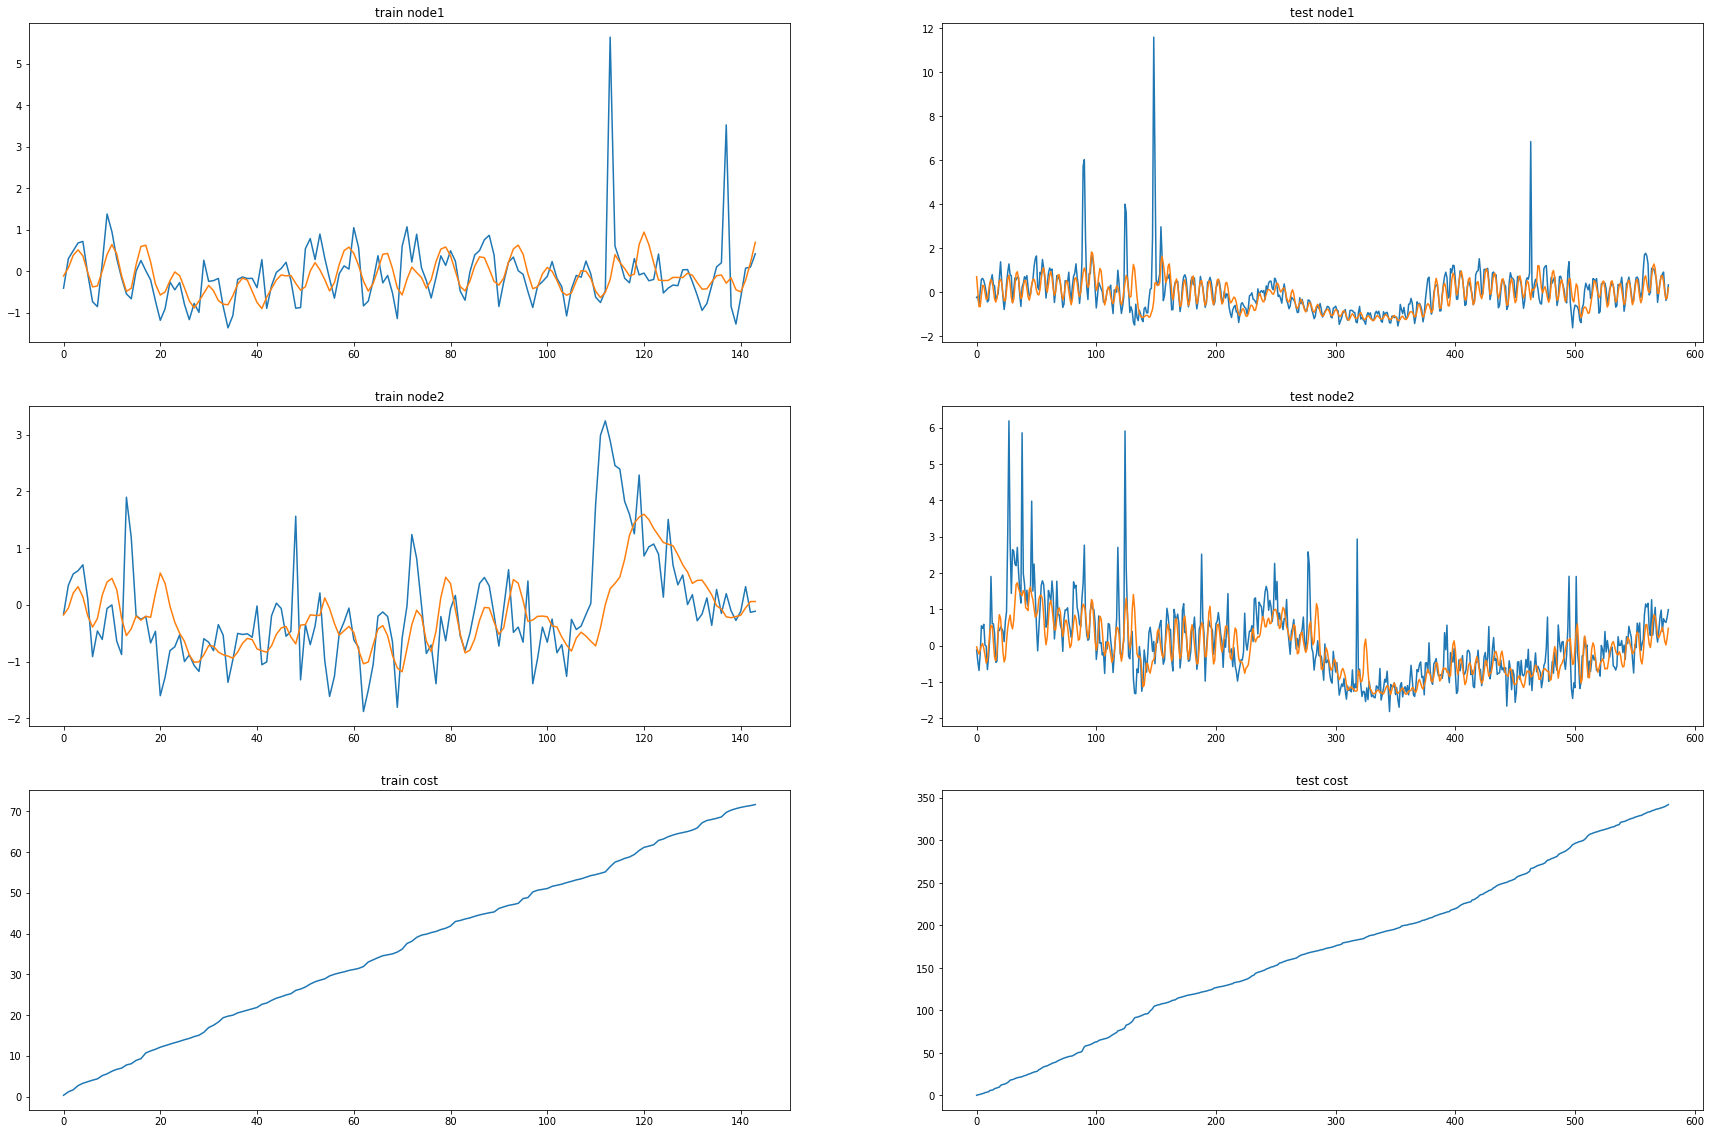

In [216]:
fig, (( ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(30,20))

ax1.set_title('train node1')
ax1.plot([train_dataset3.targets[i][0] for i in range(train_dataset3.snapshot_count)])
ax1.plot(torch.tensor([_b[i].detach()[0] for i in range(train_dataset3.snapshot_count)]))

ax2.set_title('test node1')
ax2.plot([test_dataset3.targets[i][0] for i in range(test_dataset3.snapshot_count)])
ax2.plot(torch.tensor([_a[i].detach()[0] for i in range(test_dataset3.snapshot_count)]))

ax3.set_title('train node2')
ax3.plot([train_dataset3.targets[i][1] for i in range(train_dataset3.snapshot_count)])
ax3.plot(torch.tensor([_b[i].detach()[1] for i in range(train_dataset3.snapshot_count)]))


ax4.set_title('test node2')
ax4.plot([test_dataset3.targets[i][1] for i in range(test_dataset3.snapshot_count)])
ax4.plot(torch.tensor([_a[i].detach()[1] for i in range(test_dataset3.snapshot_count)]))

ax5.set_title('train cost')
ax5.plot(_e)

ax6.set_title('test cost')
ax6.plot(_c)

### Windmillsmall Nodes = 8, Filters = 16

In [249]:
model6 = RecurrentGCN(node_features=8, filters=4)

optimizer6 = torch.optim.Adam(model6.parameters(), lr=0.01)

model6.train()

for epoch in tqdm(range(10)): #200
    cost = 0
    h, c = None, None
    _b = []
    _d=[]
    for time, snapshot in enumerate(train_dataset6):
        y_hat, h, c = model6(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
        y_hat = y_hat.reshape(-1)
        cost = cost + torch.mean((y_hat-snapshot.y)**2)
        _b.append(y_hat)
        _d.append(cost)
    cost = cost / (time+1)
    cost.backward()
    optimizer6.step()
    optimizer6.zero_grad()

100%|██████████| 10/10 [01:23<00:00,  8.34s/it]


In [250]:
model6.eval()
cost = 0
_a=[]
_a1=[]
for time, snapshot in enumerate(test_dataset6):
    y_hat, h, c = model6(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
    y_hat = y_hat.reshape(-1)
    cost = cost + torch.mean((y_hat-snapshot.y)**2)
    _a.append(y_hat)
    _a1.append(cost)
cost = cost / (time+1)
cost = cost.item()
print("MSE: {:.4f}".format(cost))

MSE: 1.0018


In [251]:
_e = [_d[i].detach() for i in range(len(_d))]

In [252]:
_c = [_a1[i].detach() for i in range(len(_a1))]

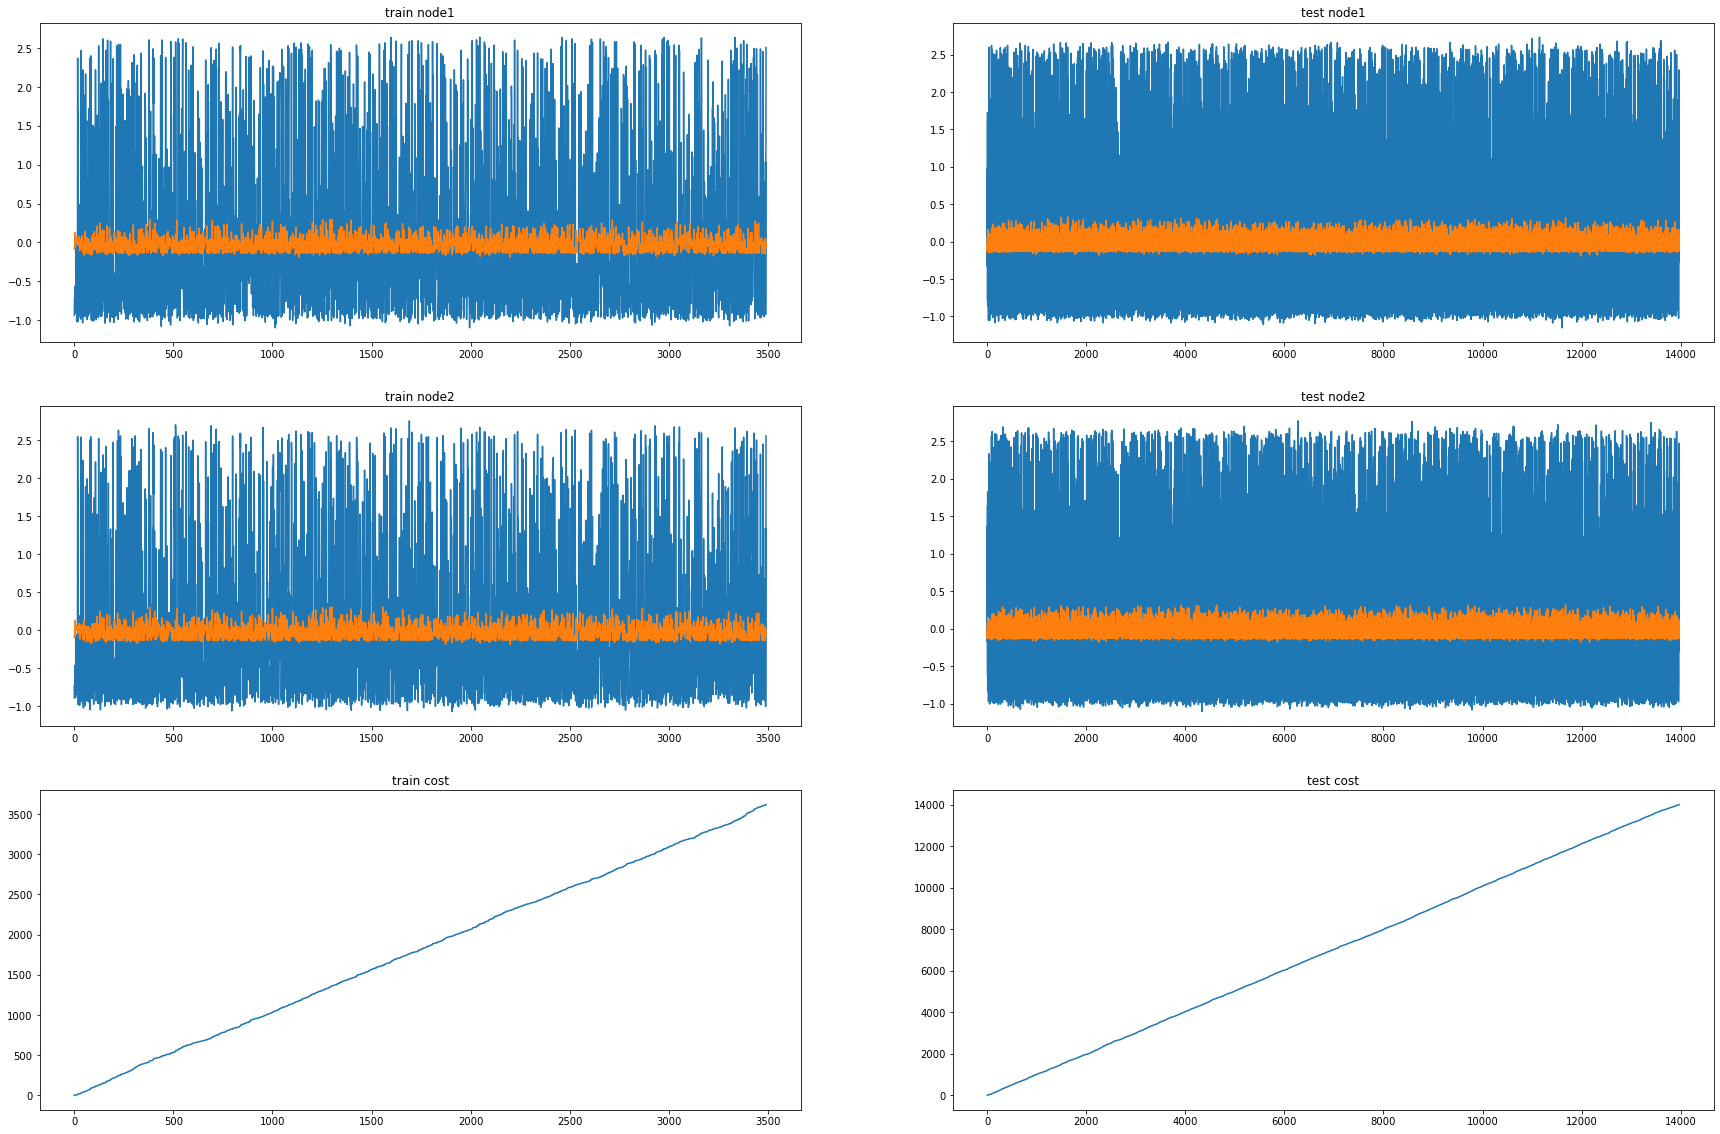

In [253]:
fig, (( ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(30,20))

ax1.set_title('train node1')
ax1.plot([train_dataset6.targets[i][0] for i in range(train_dataset6.snapshot_count)])
ax1.plot(torch.tensor([_b[i].detach()[0] for i in range(train_dataset6.snapshot_count)]))

ax2.set_title('test node1')
ax2.plot([test_dataset6.targets[i][0] for i in range(test_dataset6.snapshot_count)])
ax2.plot(torch.tensor([_a[i].detach()[0] for i in range(test_dataset6.snapshot_count)]))

ax3.set_title('train node2')
ax3.plot([train_dataset6.targets[i][1] for i in range(train_dataset6.snapshot_count)])
ax3.plot(torch.tensor([_b[i].detach()[1] for i in range(train_dataset6.snapshot_count)]))


ax4.set_title('test node2')
ax4.plot([test_dataset6.targets[i][1] for i in range(test_dataset6.snapshot_count)])
ax4.plot(torch.tensor([_a[i].detach()[1] for i in range(test_dataset6.snapshot_count)]))

ax5.set_title('train cost')
ax5.plot(_e)

ax6.set_title('test cost')
ax6.plot(_c)

### Monte Nodes = 4, Filters = 12

In [230]:
model10 = RecurrentGCN(node_features=4, filters=12)

optimizer10 = torch.optim.Adam(model10.parameters(), lr=0.01)

model10.train()

for epoch in tqdm(range(50)): #200
    cost = 0
    h, c = None, None
    _b = []
    _d=[]
    for time, snapshot in enumerate(train_dataset10):
        y_hat, h, c = model10(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
        y_hat = y_hat.reshape(-1)
        cost = cost + torch.mean((y_hat-snapshot.y)**2)
        _b.append(y_hat)
        _d.append(cost)
    cost = cost / (time+1)
    cost.backward()
    optimizer10.step()
    optimizer10.zero_grad()

100%|██████████| 50/50 [00:30<00:00,  1.66it/s]


In [231]:
model10.eval()
cost = 0
_a=[]
_a1=[]
for time, snapshot in enumerate(test_dataset10):
    y_hat, h, c = model10(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
    y_hat = y_hat.reshape(-1)
    cost = cost + torch.mean((y_hat-snapshot.y)**2)
    _a.append(y_hat)
    _a1.append(cost)
cost = cost / (time+1)
cost = cost.item()
print("MSE: {:.4f}".format(cost))

MSE: 0.8881


In [232]:
_e = [_d[i].detach() for i in range(len(_d))]

_c = [_a1[i].detach() for i in range(len(_a1))]

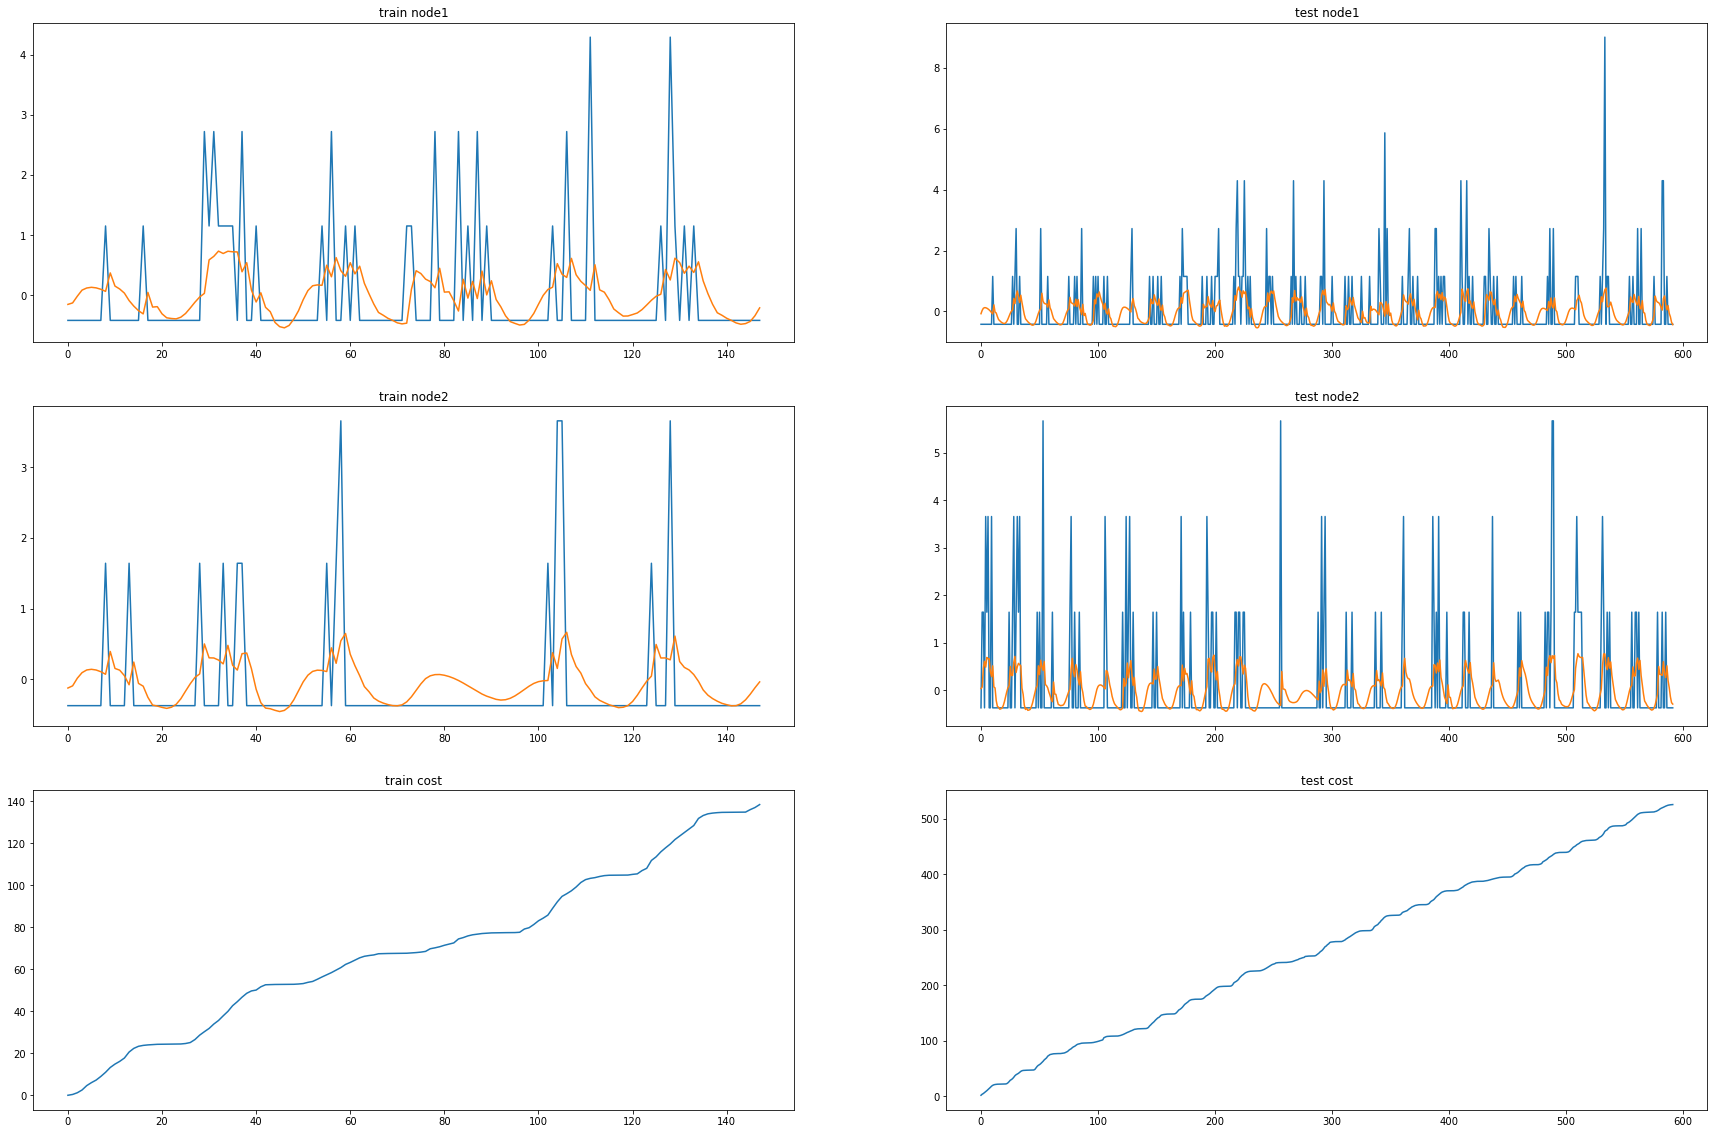

In [233]:
fig, (( ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(30,20))

ax1.set_title('train node1')
ax1.plot([train_dataset10.targets[i][0] for i in range(train_dataset10.snapshot_count)])
ax1.plot(torch.tensor([_b[i].detach()[0] for i in range(train_dataset10.snapshot_count)]))

ax2.set_title('test node1')
ax2.plot([test_dataset10.targets[i][0] for i in range(test_dataset10.snapshot_count)])
ax2.plot(torch.tensor([_a[i].detach()[0] for i in range(test_dataset10.snapshot_count)]))

ax3.set_title('train node2')
ax3.plot([train_dataset10.targets[i][10] for i in range(train_dataset10.snapshot_count)])
ax3.plot(torch.tensor([_b[i].detach()[10] for i in range(train_dataset10.snapshot_count)]))


ax4.set_title('test node2')
ax4.plot([test_dataset10.targets[i][10] for i in range(test_dataset10.snapshot_count)])
ax4.plot(torch.tensor([_a[i].detach()[10] for i in range(test_dataset10.snapshot_count)]))

ax5.set_title('train cost')
ax5.plot(_e)

ax6.set_title('test cost')
ax6.plot(_c)